In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
from sklearn.cluster import KMeans

In [3]:
X = np.array([[1,2],[1,4],[1,0],[10,2],[10,4],[10,0]])

In [4]:
kmeans = KMeans(n_clusters = 2, random_state = 0)

In [5]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [6]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [7]:
kmeans.predict([[5,0],[6,5]])

array([1, 0])

In [8]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [9]:
data = pd.DataFrame(X)

In [10]:
labels=  pd.DataFrame(kmeans.labels_,columns=['class'])

In [11]:
pd.concat([data, labels], axis =1)

,0,1,class
0,1,2,1
1,1,4,1
2,1,0,1
3,10,2,0
4,10,4,0
5,10,0,0


In [12]:
X, y = make_blobs(n_samples = 10000, centers = 4, n_features =2, random_state= 1564)

In [13]:
X[0:4,:]

array([[-9.17017412, -0.09274059],
       [-8.87055922,  0.07277104],
       [-3.28399427,  4.2732692 ],
       [-6.59808264,  8.67975708]])

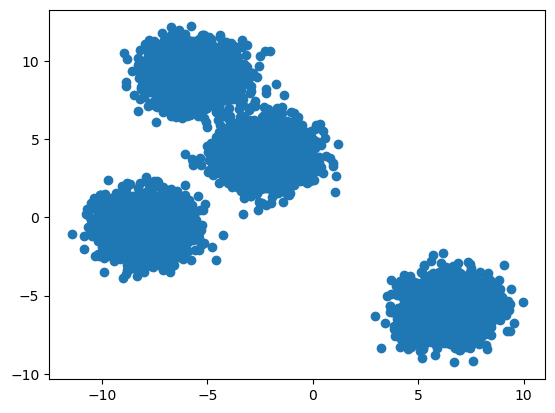

In [14]:
plt.scatter(X[:,0],X[:,1])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=8784)

In [16]:
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init= "k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    

In [17]:
wcss

[127163.42193267583,
 47605.6155355215,
 13985.978335679747,
 12811.226397419361,
 11683.793733468685,
 10595.62091105361,
 9443.695728975455,
 8663.289710572371,
 7904.355558343658]

Text(0.5, 0, '# of clusters')

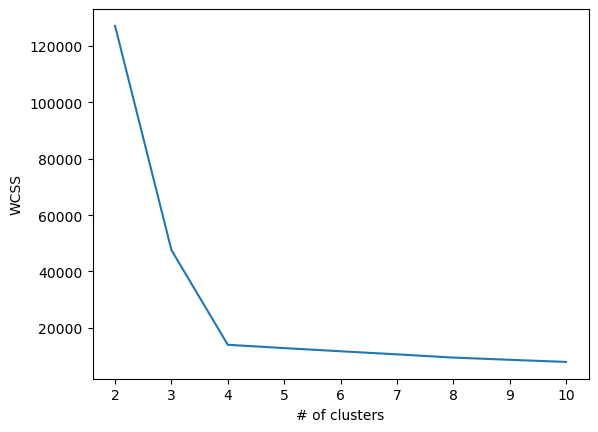

In [18]:
plt.plot(range(2,11), wcss)
plt.xticks(range(2,11))
plt.ylabel('WCSS')
plt.xlabel('# of clusters')


# Elbow method , Choose K= 4

In [19]:
kmeans = KMeans(n_clusters=4, init ='k-means++').fit(X)

In [20]:
kmeans.inertia_

20030.75333869872

In [21]:
y_labels = kmeans.predict(X_train)

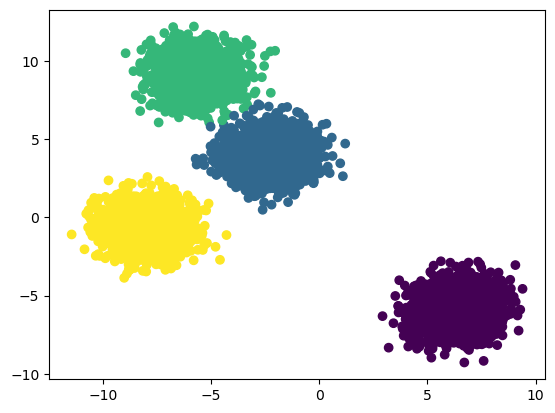

In [22]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_labels)

In [25]:
from kneed import KneeLocator

In [27]:
kneelocator = KneeLocator(range(2,11),wcss, curve='convex',direction='decreasing')

In [28]:
kneelocator.all_elbows

{4}

In [30]:
kneelocator.elbow

4

In [29]:
kneelocator.y

array([127163.42193268,  47605.61553552,  13985.97833568,  12811.22639742,
        11683.79373347,  10595.62091105,   9443.69572898,   8663.28971057,
         7904.35555834])

In [31]:
from sklearn.metrics import silhouette_score

In [35]:
sil_score = []
for i in range(2,11):
    kmean1  = KMeans(n_clusters=i, init = 'k-means++')
    kmean1.fit(X_train)
    sil_score.append(silhouette_score(X_train, kmean1.labels_))
    

In [36]:
sil_score

[0.6891214720672633,
 0.6810383329814961,
 0.7599986476605437,
 0.6495622140839258,
 0.5490181957017694,
 0.3963849039131183,
 0.30539138925518905,
 0.31333853933725003,
 0.32029921109915477]

In [ ]:
plt.plot(range(2,11),sil_score)
plt.ylabel('sil_score')
plt.xticks(range(2,11))
plt.xlabel('# of clusters')

# you have a daset   classification dataset(wafer data)

you have multiple files

take all the files and create a single dataframe

then you have to perform clustering (kmean, hirarchical , dbscan)

after clustering the data will be segregated

then you have to perform supervised learning on each every cluster


# This semi supervised technique